In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler


In [2]:
df= pd.read_csv("datairis.csv")

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# Select only sepal length and width (first two columns)
X = df.iloc[:, [0, 1]].values  # SepalLengthCm, SepalWidthCm

In [5]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
# Standardize the data
X = StandardScaler().fit_transform(X)

In [7]:
# Initialize DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)

In [8]:
# Fit and predict clusters
clusters = dbscan.fit_predict(X)


In [9]:
# Number of clusters (excluding noise if present)
n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
n_noise = list(clusters).count(-1)


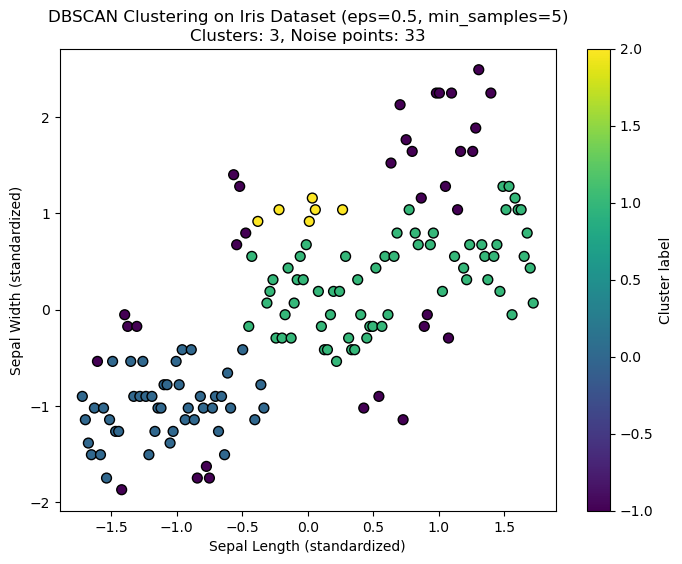

In [10]:
# Plot the clusters
plt.figure(figsize=(8, 6))

# Create scatter plot
scatter = plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis', s=50, edgecolors='k')

# Add labels and title
plt.xlabel('Sepal Length (standardized)')
plt.ylabel('Sepal Width (standardized)')
plt.title(f'DBSCAN Clustering on Iris Dataset (eps=0.5, min_samples=5)\nClusters: {n_clusters}, Noise points: {n_noise}')

# Add colorbar
plt.colorbar(scatter, label='Cluster label')

plt.show()

## petal length and petal width

In [11]:
# Select only sepal length and width (first two columns)
X = df.iloc[:, [2, 3]].values  # SepalLengthCm, SepalWidthCm

In [12]:
X

array([[3.5, 1.4],
       [3. , 1.4],
       [3.2, 1.3],
       [3.1, 1.5],
       [3.6, 1.4],
       [3.9, 1.7],
       [3.4, 1.4],
       [3.4, 1.5],
       [2.9, 1.4],
       [3.1, 1.5],
       [3.7, 1.5],
       [3.4, 1.6],
       [3. , 1.4],
       [3. , 1.1],
       [4. , 1.2],
       [4.4, 1.5],
       [3.9, 1.3],
       [3.5, 1.4],
       [3.8, 1.7],
       [3.8, 1.5],
       [3.4, 1.7],
       [3.7, 1.5],
       [3.6, 1. ],
       [3.3, 1.7],
       [3.4, 1.9],
       [3. , 1.6],
       [3.4, 1.6],
       [3.5, 1.5],
       [3.4, 1.4],
       [3.2, 1.6],
       [3.1, 1.6],
       [3.4, 1.5],
       [4.1, 1.5],
       [4.2, 1.4],
       [3.1, 1.5],
       [3.2, 1.2],
       [3.5, 1.3],
       [3.1, 1.5],
       [3. , 1.3],
       [3.4, 1.5],
       [3.5, 1.3],
       [2.3, 1.3],
       [3.2, 1.3],
       [3.5, 1.6],
       [3.8, 1.9],
       [3. , 1.4],
       [3.8, 1.6],
       [3.2, 1.4],
       [3.7, 1.5],
       [3.3, 1.4],
       [3.2, 4.7],
       [3.2, 4.5],
       [3.1,

In [13]:
# Standardize the data
X = StandardScaler().fit_transform(X)

In [14]:
# DBSCAN with tuned parameters for petal features
dbscan = DBSCAN(eps=0.3, min_samples=5)  # Optimized for petal dimensions

In [15]:
# Fit and predict clusters
clusters = dbscan.fit_predict(X)

In [16]:
# Cluster metrics
n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
n_noise = list(clusters).count(-1)

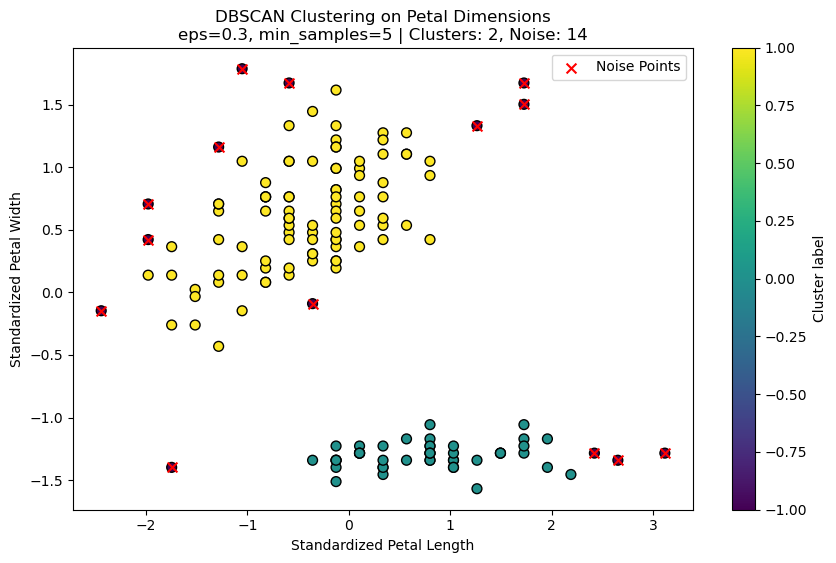

In [17]:
# Visualization
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X[:, 0], X[:, 1], 
                      c=clusters, cmap='viridis', 
                      s=50, edgecolors='k')
plt.xlabel('Standardized Petal Length')
plt.ylabel('Standardized Petal Width')
plt.title(f'DBSCAN Clustering on Petal Dimensions\neps=0.3, min_samples=5 | Clusters: {n_clusters}, Noise: {n_noise}')
plt.colorbar(scatter, label='Cluster label')


# Mark noise points distinctly
if -1 in clusters:
    noise_mask = (clusters == -1)
    plt.scatter(X[noise_mask, 0], X[noise_mask, 1], 
               c='red', marker='x', s=50, 
               label='Noise Points')
    plt.legend()

plt.show()

Clusters found: 2
Noise points: 2


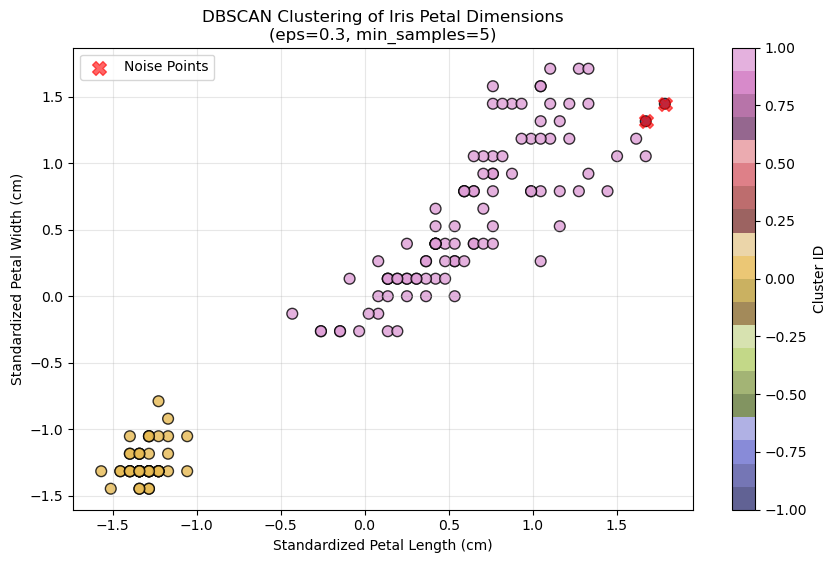

Silhouette Score: 0.480
Interpretation:
0.71+ = Strong structure
0.51-0.70 = Reasonable structure
<0.50 = Weak structure

Parameter Sensitivity Test:


In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Load data and extract petal dimensions
iris = load_iris()
petal_data = pd.DataFrame(iris.data[:, [2,3]],  # Columns 2 & 3 (0-indexed)
                         columns=['Petal Length', 'Petal Width'])

# Standardize features
scaler = StandardScaler()
petal_std = scaler.fit_transform(petal_data)

# Optimized DBSCAN for petal features
dbscan = DBSCAN(eps=0.3, min_samples=5)
cluster_labels = dbscan.fit_predict(petal_std)

# Cluster analysis
unique_clusters = set(cluster_labels)
n_clusters = len(unique_clusters) - (1 if -1 in unique_clusters else 0)
n_noise = sum(cluster_labels == -1)

print(f"Clusters found: {n_clusters}")
print(f"Noise points: {n_noise}")

# Enhanced visualization
plt.figure(figsize=(10,6))
sc = plt.scatter(petal_std[:,0], petal_std[:,1],
                c=cluster_labels, cmap='tab20b',
                s=60, edgecolor='k', alpha=0.8)

# Highlight noise if exists
if -1 in cluster_labels:
    noise_mask = cluster_labels == -1
    plt.scatter(petal_std[noise_mask,0], petal_std[noise_mask,1],
               c='red', marker='X', s=100,
               label='Noise Points', alpha=0.6)
    plt.legend()

plt.colorbar(sc, label='Cluster ID')
plt.xlabel('Standardized Petal Length (cm)')
plt.ylabel('Standardized Petal Width (cm)')
plt.title('DBSCAN Clustering of Iris Petal Dimensions\n(eps=0.3, min_samples=5)')
plt.grid(True, alpha=0.3)
plt.show()

# Quantitative evaluation
if n_clusters > 1:
    sil_score = silhouette_score(petal_std, cluster_labels)
    print(f"Silhouette Score: {sil_score:.3f}")
    print("Interpretation:")
    print("0.71+ = Strong structure\n0.51-0.70 = Reasonable structure\n<0.50 = Weak structure")
else:
    print("Need parameter adjustment - only one cluster found")

# Parameter sensitivity analysis
print("\nParameter Sensitivity Test:")
test_params = {'eps': [0.25, 0.3, 0.35], 'min_samples': [3, 5, 7]}
for e in test_params['eps']:
    for m in test_params['min_samples']:
        temp_labels = DBSCAN(eps=e, min_samples=m)